In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [99]:
import glob

In [16]:
glob.glob(r"C:\Users\Lenovo\Documents\New folder\Stock_Data Analysis\individual_stocks_5yr-20240823T041722Z-001\individual_stocks_5yr/*csv")

['C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individ

In [15]:
len(glob.glob(r"C:\Users\Lenovo\Documents\New folder\Stock_Data Analysis\individual_stocks_5yr-20240823T041722Z-001\individual_stocks_5yr/*csv"))

509

In [22]:
company_list = [
    r"C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\AAPL_data.csv",
    r'C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\MSFT_data.csv'
]

In [23]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [24]:
df = pd.read_csv(r"C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\AAPL_data.csv")

In [25]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    
    all_data = current_df.append(all_data, ignore_index = True)
    

In [26]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [30]:
all_data.shape

(4752, 7)

In [28]:
all_data["Name"].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [37]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [41]:
# Changing the type of date to date:::
all_data['date'] = pd.to_datetime(all_data['date'])

In [42]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [48]:
tech_list = all_data["Name"].unique()

In [49]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

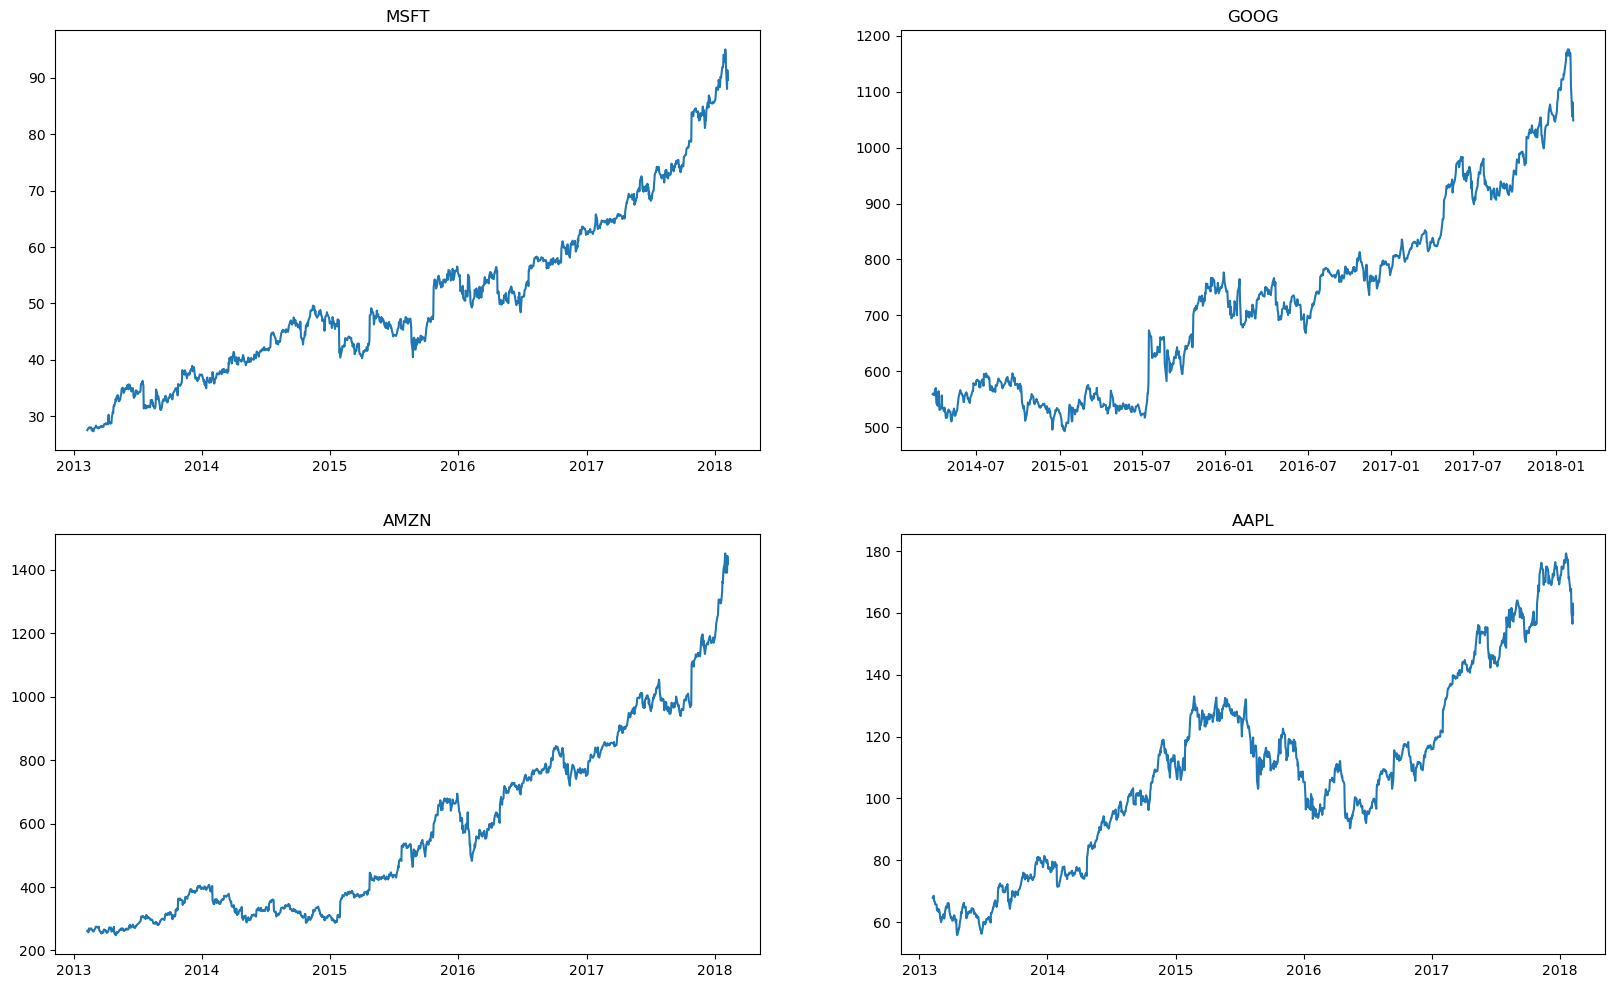

In [78]:
plt.figure(figsize=(20,12))

for index,company in enumerate(tech_list,start=1):
    plt.subplot(2,2,index)
    filter1 = all_data["Name"]==company
    df = all_data[filter1]
    plt.plot(df["date"],df["close"],)
    plt.title(company)


In [81]:
# Calculating the moving average:::
all_data["close"].rolling(window = 10).mean().head(15)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
14    27.7475
Name: close, dtype: float64

In [82]:
new_data = all_data.copy()

In [83]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data["close_" + str(ma)] = new_data["close"].rolling(window = ma).mean()
    
    

In [84]:
new_data.tail(8)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4744,2018-01-29,170.160,170.1600,167.0700,167.96,50640406,AAPL,175.185,174.4470,172.9882
4745,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,174.263,174.3340,172.9460
4746,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,173.096,174.0925,172.8726
4747,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [85]:
new_data.set_index("date",inplace = True)

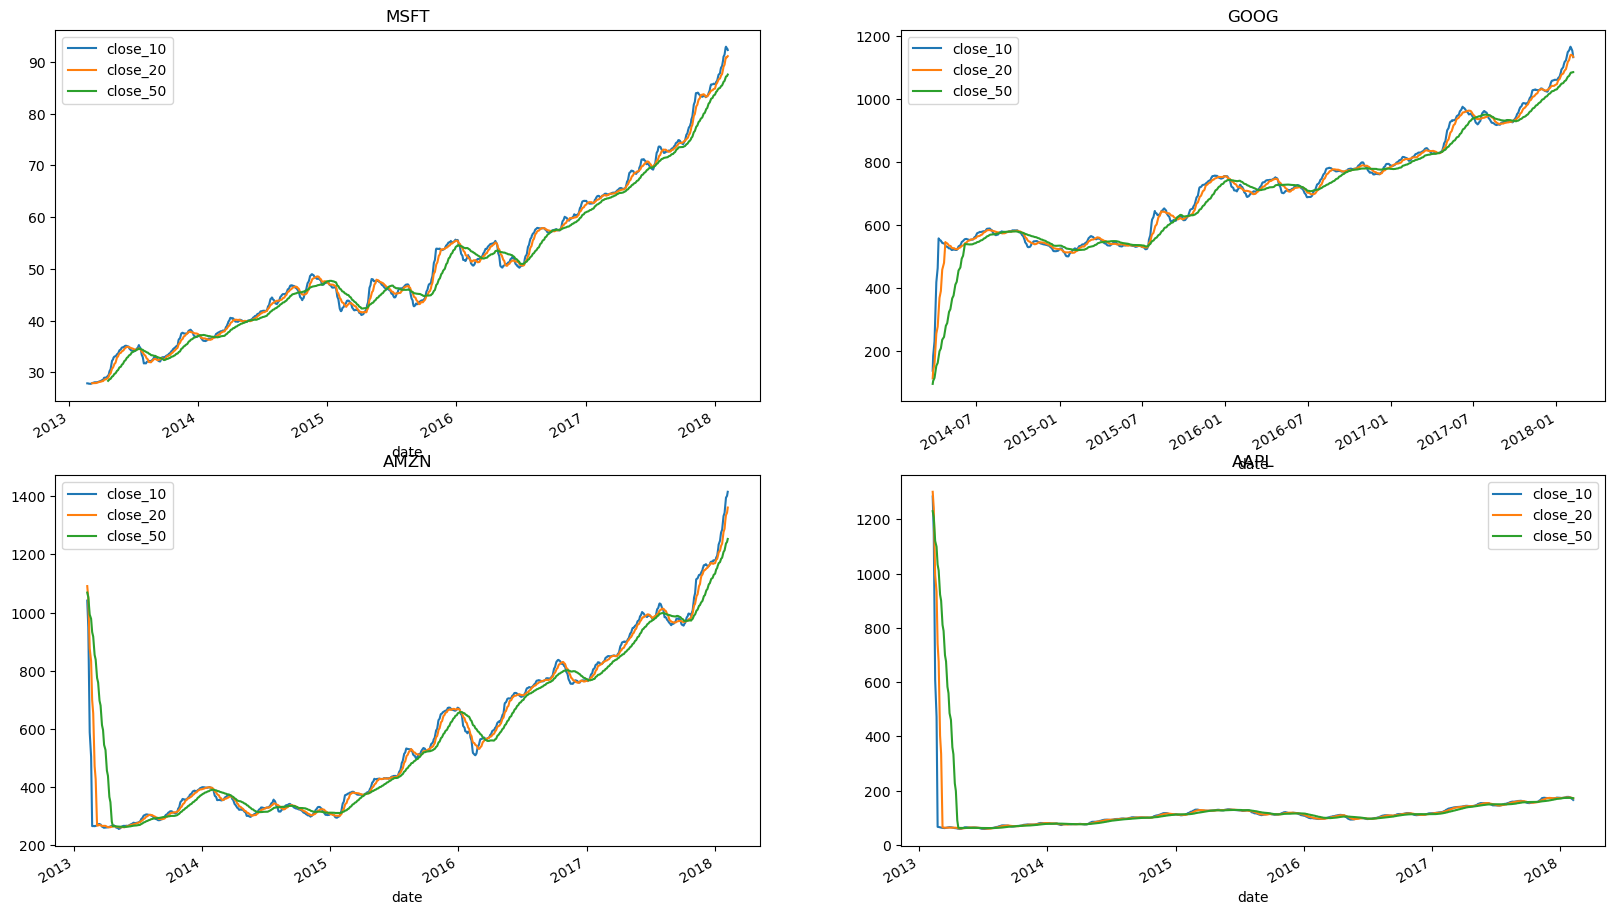

In [86]:
plt.figure(figsize=(20,12))

for index,company in enumerate(tech_list,start=1):
    plt.subplot(2,2,index)
    filter1 = new_data["Name"]==company
    df = new_data[filter1]
    df[["close_10","close_20","close_50"]].plot(ax=plt.gca())
    plt.title(company)

In [100]:
# Analysing the Closing price change in Apple Stock:::
apple = pd.read_csv(r"C:\\Users\\Lenovo\\Documents\\New folder\\Stock_Data Analysis\\individual_stocks_5yr-20240823T041722Z-001\\individual_stocks_5yr\\AAPL_data.csv")
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [101]:
apple["close"].pct_change()*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

In [102]:
apple["Daily Return in % change"] = apple["close"].pct_change()*100
apple.head(4)

,date,open,high,low,close,volume,Name,Daily Return in % change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [103]:
# Graphically represt the Data:::
import plotly.express as px

In [104]:
px.line(apple, x="date",y="Daily Return in % change")

In [105]:
## Resampling Analysis of Closing Price:::


In [106]:
apple.head()

,date,open,high,low,close,volume,Name,Daily Return in % change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [107]:
apple.dtypes

date                         object
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
Name                         object
Daily Return in % change    float64
dtype: object

In [108]:
apple["date"]= pd.to_datetime(apple["date"])

In [109]:
apple.dtypes

date                        datetime64[ns]
open                               float64
high                               float64
low                                float64
close                              float64
volume                               int64
Name                                object
Daily Return in % change           float64
dtype: object

In [110]:
# Setting the index of date::
apple.set_index("date",inplace=True)

In [111]:
apple.head(3)

,open,high,low,close,volume,Name,Daily Return in % change
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658


<Axes: xlabel='date'>

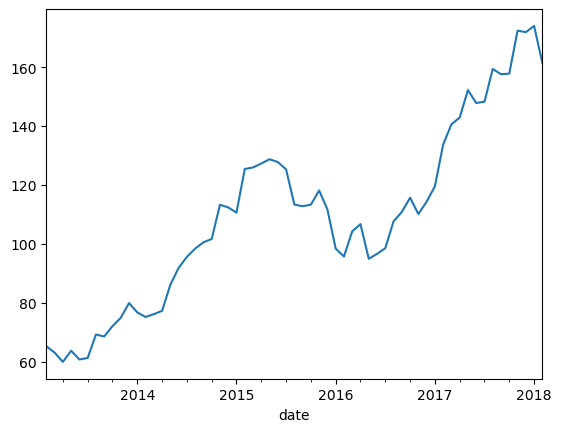

In [113]:
# Monthly change in closing price::

apple["close"].resample("m").mean().plot()

<Axes: xlabel='date'>

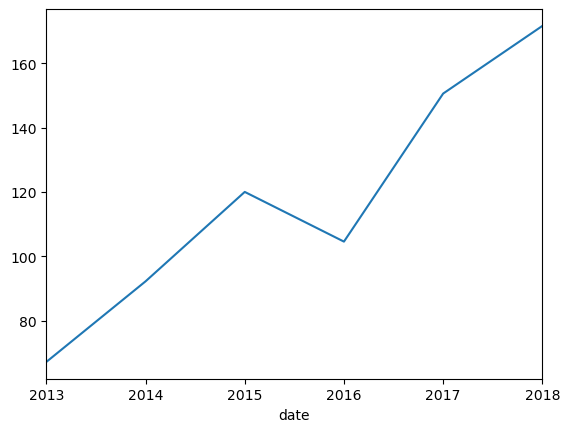

In [114]:
# Yearly change in closing price::

apple["close"].resample("y").mean().plot()

<Axes: xlabel='date'>

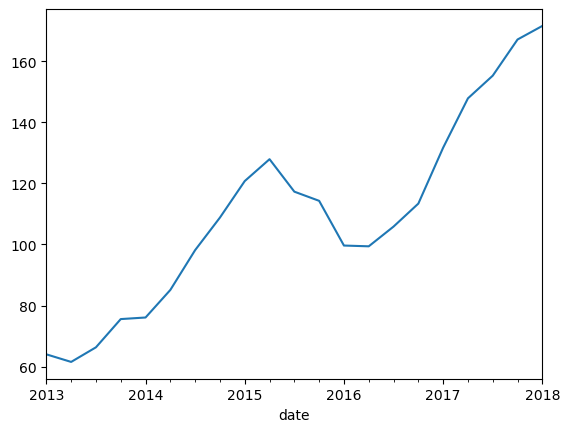

In [115]:
# Quartly change in closing price::
apple["close"].resample("q").mean().plot()

In [116]:
## Checking the closing prices of companies are co-related with each other or not?:::
company_list

['C:\\\\Users\\\\Lenovo\\\\Documents\\\\New folder\\\\Stock_Data Analysis\\\\individual_stocks_5yr-20240823T041722Z-001\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Lenovo\\\\Documents\\\\New folder\\\\Stock_Data Analysis\\\\individual_stocks_5yr-20240823T041722Z-001\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Lenovo\\\\Documents\\\\New folder\\\\Stock_Data Analysis\\\\individual_stocks_5yr-20240823T041722Z-001\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Lenovo\\\\Documents\\\\New folder\\\\Stock_Data Analysis\\\\individual_stocks_5yr-20240823T041722Z-001\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [119]:
apple = pd.read_csv(company_list[0])
amzn =  pd.read_csv(company_list[1])
goog =  pd.read_csv(company_list[2])
msft =  pd.read_csv(company_list[3])

In [120]:
closing_price = pd.DataFrame()

In [121]:
closing_price["apple_cl"] = apple["close"]
closing_price["amzn_cl"] = amzn["close"]
closing_price["goog_cl"] = goog["close"]
closing_price["msft_cl"] = msft["close"]

In [122]:
closing_price.head()

,apple_cl,amzn_cl,goog_cl,msft_cl
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


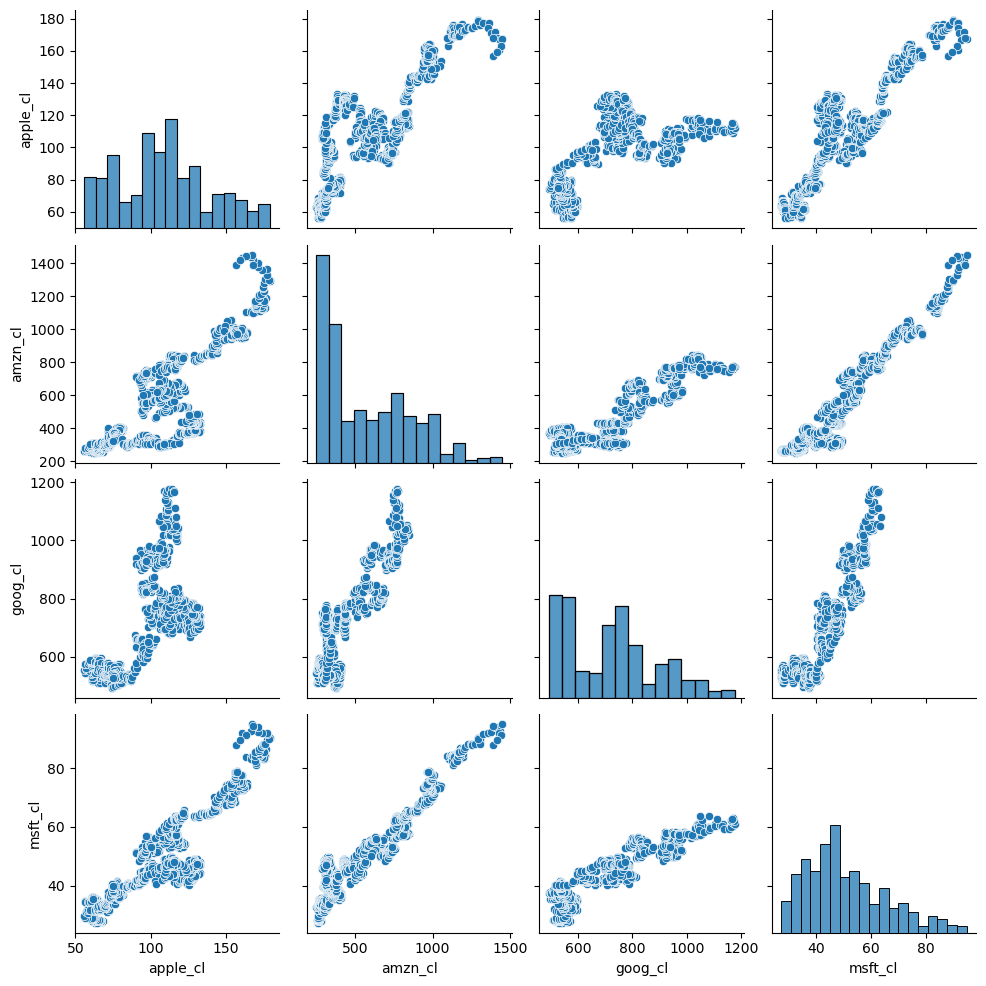

In [123]:
sns.pairplot(closing_price)

In [127]:
closing_price.corr()

,apple_cl,amzn_cl,goog_cl,msft_cl
apple_cl,1.000000,0.819078,0.640522,0.899689
amzn_cl,0.819078,1.000000,0.888456,0.955977
goog_cl,0.640522,0.888456,1.000000,0.907011
msft_cl,0.899689,0.955977,0.907011,1.000000


<Axes: >

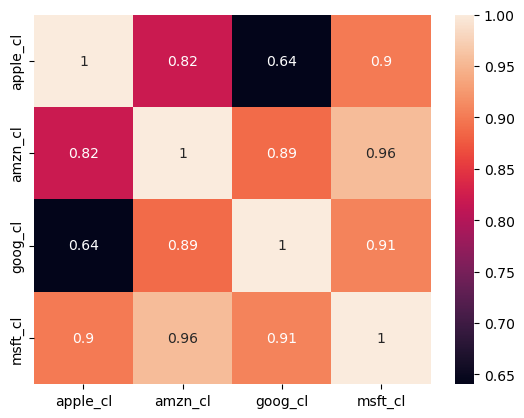

In [129]:
sns.heatmap(closing_price.corr(),annot=True)

In [130]:
all_data

,date,open,high,low,close,volume,Name
0,2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT
1,2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT
2,2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT
3,2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT
4,2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...
4747,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL
4748,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL


In [131]:
## closing price of the stock and daily return of the stock are co-related or not:::

In [134]:
new_cl_price = closing_price

In [145]:
new_cl_price = new_cl_price.pct_change()*100

In [146]:
new_cl_price.columns

Index(['apple_cl_%', 'amzn_cl_%', 'goog_cl_%', 'msft_cl_%'], dtype='object')

In [147]:
new_name = {"apple_cl" : "apple_cl_%", "amzn_cl":"amzn_cl_%","goog_cl":"goog_cl_%","msft_cl":"msft_cl_%"}
new_cl_price.rename(columns = new_name,inplace = True)

In [148]:
new_cl_price.columns

Index(['apple_cl_%', 'amzn_cl_%', 'goog_cl_%', 'msft_cl_%'], dtype='object')

In [149]:
new_cl_price

,apple_cl_%,amzn_cl_%,goog_cl_%,msft_cl_%
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,0.000000,-0.789391
1255,-4.339015,2.874101,0.000000,-2.631021
1256,-2.498442,-2.793804,0.000000,-4.118544
1257,4.179181,3.801439,0.000000,3.784091


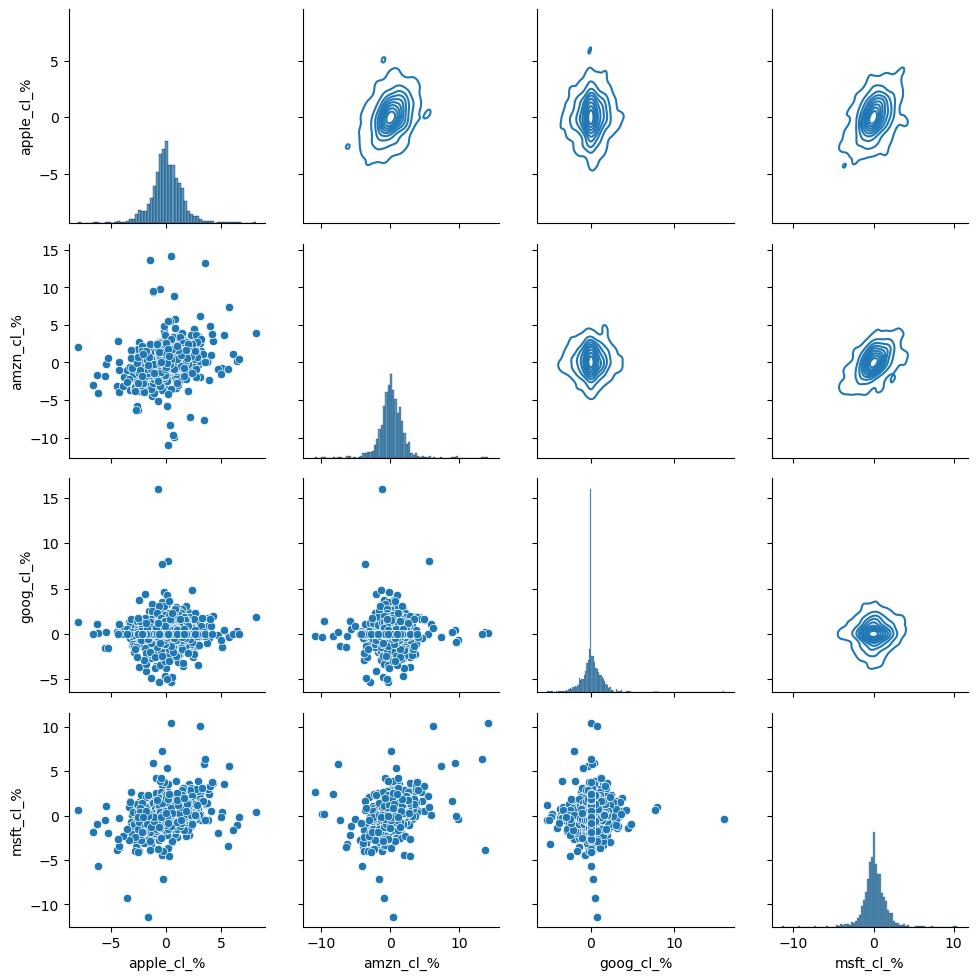

In [150]:
g = sns.PairGrid(data=new_cl_price)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [152]:
# Corelation between the % change in closing prices of different stocks
new_cl_price.corr()

,apple_cl_%,amzn_cl_%,goog_cl_%,msft_cl_%
apple_cl_%,1.000000,0.287659,0.032996,0.366598
amzn_cl_%,0.287659,1.000000,0.025323,0.402678
goog_cl_%,0.032996,0.025323,1.000000,0.036436
msft_cl_%,0.366598,0.402678,0.036436,1.000000
